Predicted discharge for a 150-year flood: 247793.23 cfs
Flood discharge with 8% chance of occurring in any year: 156315.88 cfs
Probability of stream flow reaching 5000 m³/sec: 4.61%


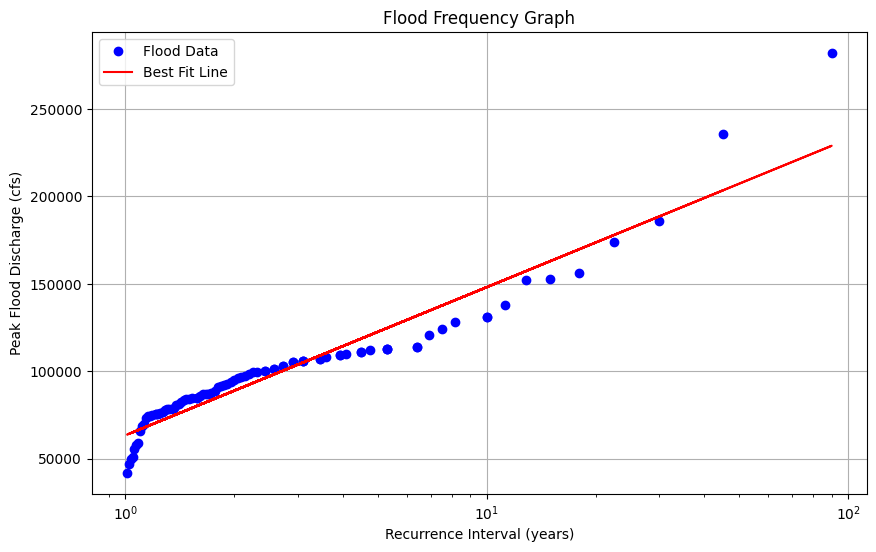

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

data = {
    'Year': [1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'Peak Flood Discharge (cfs)': [84800, 57600, 78100, 98400, 153000, 124000, 100000, 282000, 103000, 236000, 103000, 121000, 50000, 73200, 75000, 75400, 95000, 75800, 97000, 131000, 138000, 84300, 106000, 113000, 131000, 83500, 174000, 110000, 47100, 109000, 99700, 156000, 76400, 101000, 87200, 84600, 41700, 59200, 84000, 105000, 109000, 78700, 78400, 90900, 100000, 99400, 68500, 107000, 114000, 69600, 112000, 86700, 113000, 108000, 84800, 186000, 50800, 92300, 152000, 78500, 93900, 101000, 81300, 74300, 107000, 106000, 55500, 113000, 87500, 111000, 80800, 82300, 106000, 75900, 88700, 96100, 105000, 114000, 111000, 85700, 87000, 96900, 128000, 66000, 75400, 92500, 78300, 91500, 74600]
}

df = pd.DataFrame(data)

df['Rank'] = df['Peak Flood Discharge (cfs)'].rank(ascending=False).astype(int)

n = len(df)
df['Recurrence Interval (years)'] = (n + 1) / df['Rank']

plt.figure(figsize=(10, 6))
plt.semilogx(df['Recurrence Interval (years)'], df['Peak Flood Discharge (cfs)'], 'bo', label="Flood Data")
plt.xlabel('Recurrence Interval (years)')
plt.ylabel('Peak Flood Discharge (cfs)')
plt.title('Flood Frequency Graph')
plt.grid(True)

log_recurrence_intervals = np.log10(df['Recurrence Interval (years)'])
slope, intercept, r_value, p_value, std_err = stats.linregress(log_recurrence_intervals, df['Peak Flood Discharge (cfs)'])

best_fit = intercept + slope * log_recurrence_intervals
plt.plot(df['Recurrence Interval (years)'], best_fit, 'r-', label="Best Fit Line")
plt.legend()

log_T_150 = np.log10(150)
predicted_discharge_150 = intercept + slope * log_T_150
print(f"Predicted discharge for a 150-year flood: {predicted_discharge_150:.2f} cfs")

log_T_12_5 = np.log10(12.5)
predicted_discharge_12_5 = intercept + slope * log_T_12_5
print(f"Flood discharge with 8% chance of occurring in any year: {predicted_discharge_12_5:.2f} cfs")

discharge_5000_m3 = 176573.5
T_5000 = 10**((discharge_5000_m3 - intercept) / slope)
probability_5000 = 1 / T_5000
print(f"Probability of stream flow reaching 5000 m³/sec: {probability_5000 * 100:.2f}%")

plt.show()
